# ANALYZING TIME SERIES DATA

###### Contents:

- 01. Importing libraries and data

- 02. Data prep for time series

- 03. Time series analysis: Decomposition

- 04. Testing for Stationarity

In [1]:
# Import libraries

##import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Assign path

path = r'C:\Users\fiyin\OneDrive\Documents\Achievement 6\NYC Motor Vehicle Collisons Analysis'

In [3]:
# Import data

collisions = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared data', 'collisions_explored.pkl'))

In [4]:
collisions.shape

(1001137, 34)

In [5]:
collisions.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,PERSONS INJURED,PERSONS KILLED,...,CRASH Y-M,CRASH MONTH NO,CRASH MONTH,INJURY FLAG,DEATH FLAG,COVID FLAG,DUI FLAG,DUI SUM,INJURED BOROUGH TOTAL,KILLED BOROUGH TOTAL
0,2021-09-11,02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,2,0,...,2021-09,09,September,1.0,0.0,Covid and after,0.0,860.0,NaN,NaN
1,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,1,0,...,2022-03,03,March,1.0,0.0,Covid and after,0.0,137.0,NaN,NaN
2,2022-06-29,06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,0,0,...,2022-06,06,June,0.0,0.0,Covid and after,0.0,398.0,NaN,NaN
3,2021-09-11,09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,0,0,...,2021-09,09,September,0.0,0.0,Covid and after,0.0,192.0,71157.0,288.0
4,2021-12-14,08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,0,0,...,2021-12,12,December,0.0,0.0,Covid and after,0.0,222.0,71157.0,288.0


### 02. Data prep for time series

In [6]:
# Creating subset for time series using the date, and the number of persons injured. 

collisions_sub = collisions[['CRASH Y-M', 'PERSONS INJURED']]

In [7]:
collisions_sub.shape

(1001137, 2)

In [8]:
collisions_sub.head()

,CRASH Y-M,PERSONS INJURED
0,2021-09,2
1,2022-03,1
2,2022-06,0
3,2021-09,0
4,2021-12,0


In [9]:
# Get the total number of PERSONS INJURED grouped by year and month combination. Results stored in new column

collisions_sub['PERSONS INJURED Y-M'] = collisions_sub.groupby(['CRASH Y-M'])['PERSONS INJURED'].transform(np.sum)

In [10]:
collisions_sub.head()

,CRASH Y-M,PERSONS INJURED,PERSONS INJURED Y-M
0,2021-09,2,4977
1,2022-03,1,4204
2,2022-06,0,4984
3,2021-09,0,4977
4,2021-12,0,4101


In [11]:
# Keep only unique date and month combination by dropping duplicates

collisions_sub = collisions_sub.drop_duplicates('CRASH Y-M')

In [12]:
collisions_sub.shape

(72, 3)

In [13]:
collisions_sub.head()

,CRASH Y-M,PERSONS INJURED,PERSONS INJURED Y-M
0,2021-09,2,4977
1,2022-03,1,4204
2,2022-06,0,4984
4,2021-12,0,4101
5,2021-04,0,4097


In [14]:
# Keep only relevant columns for time series

collisions_sub = collisions_sub[['CRASH Y-M', 'PERSONS INJURED Y-M']]

In [15]:
collisions_sub.shape

(72, 2)

In [16]:
collisions_sub.head()

,CRASH Y-M,PERSONS INJURED Y-M
0,2021-09,4977
1,2022-03,4204
2,2022-06,4984
4,2021-12,4101
5,2021-04,4097


In [17]:
# Sort the date values in asscending order

collisions_sub = collisions_sub.sort_values(by = 'CRASH Y-M')

In [18]:
collisions_sub.head(10)

,CRASH Y-M,PERSONS INJURED Y-M
902119,2017-01,4529
64157,2017-02,3961
903858,2017-03,4464
853961,2017-04,4556
853836,2017-05,5471
853820,2017-06,5730
736140,2017-07,5455
789760,2017-08,5353
269749,2017-09,5615
269226,2017-10,5634


In [19]:
# Set the date column as the index

from datetime import datetime

collisions_sub['year-month'] = pd.to_datetime(collisions_sub['CRASH Y-M']) # Create a year-month column from CRASH Y-M
collisions_sub = collisions_sub.set_index('year-month') # Set the year-month as the index of the dataframe.
collisions_sub.drop(['CRASH Y-M'], axis = 1, inplace = True) # Drop the CRASH Y-M column.
collisions_sub.head()

,PERSONS INJURED Y-M
year-month,
2017-01-01,4529
2017-02-01,3961
2017-03-01,4464
2017-04-01,4556
2017-05-01,5471


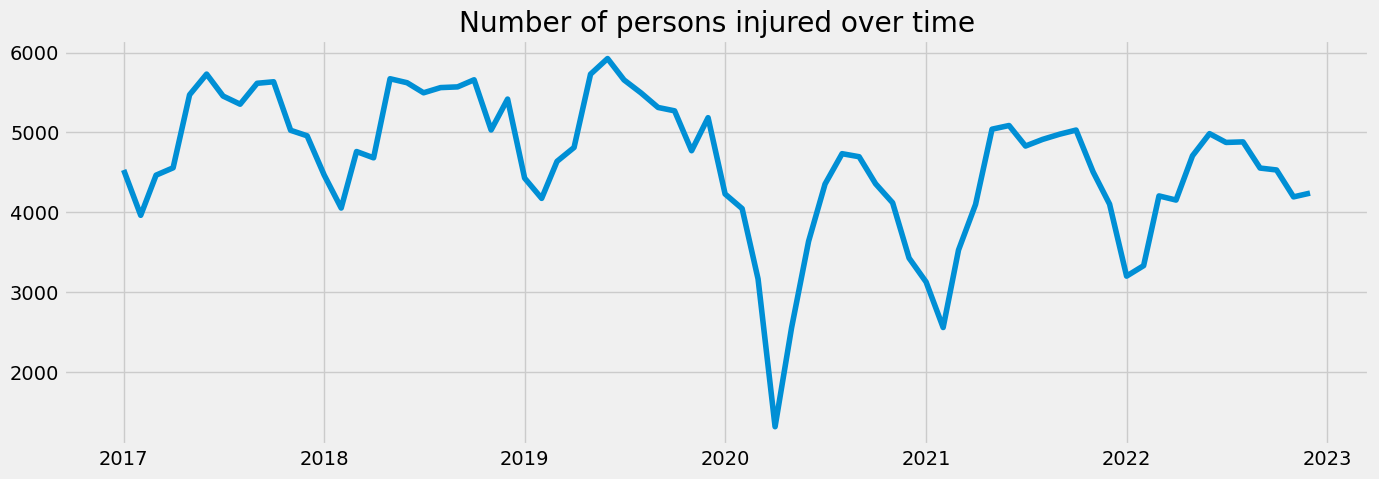

In [20]:
# Line chart of subset

plt.figure(figsize=(15,5), dpi=100)
plt.plot(collisions_sub)
plt.title('Number of persons injured over time')
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'persons_injured_time_series.png'))

##### Notes:
The line chart here suggests seasonality beacause there is a pattern where the trend rises and falls at intervals. It seems that accidents are lowest both at the beginning and at the end of the year. There is a sharp decline in the trend around the beginning of 2020 which is obviously due to the Covid lockdowns where there was restricted movement.

### 03. Time series analysis: Decomposition

In [21]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(collisions_sub, model= 'additive')

In [22]:
from pylab import rcParams 

# Define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

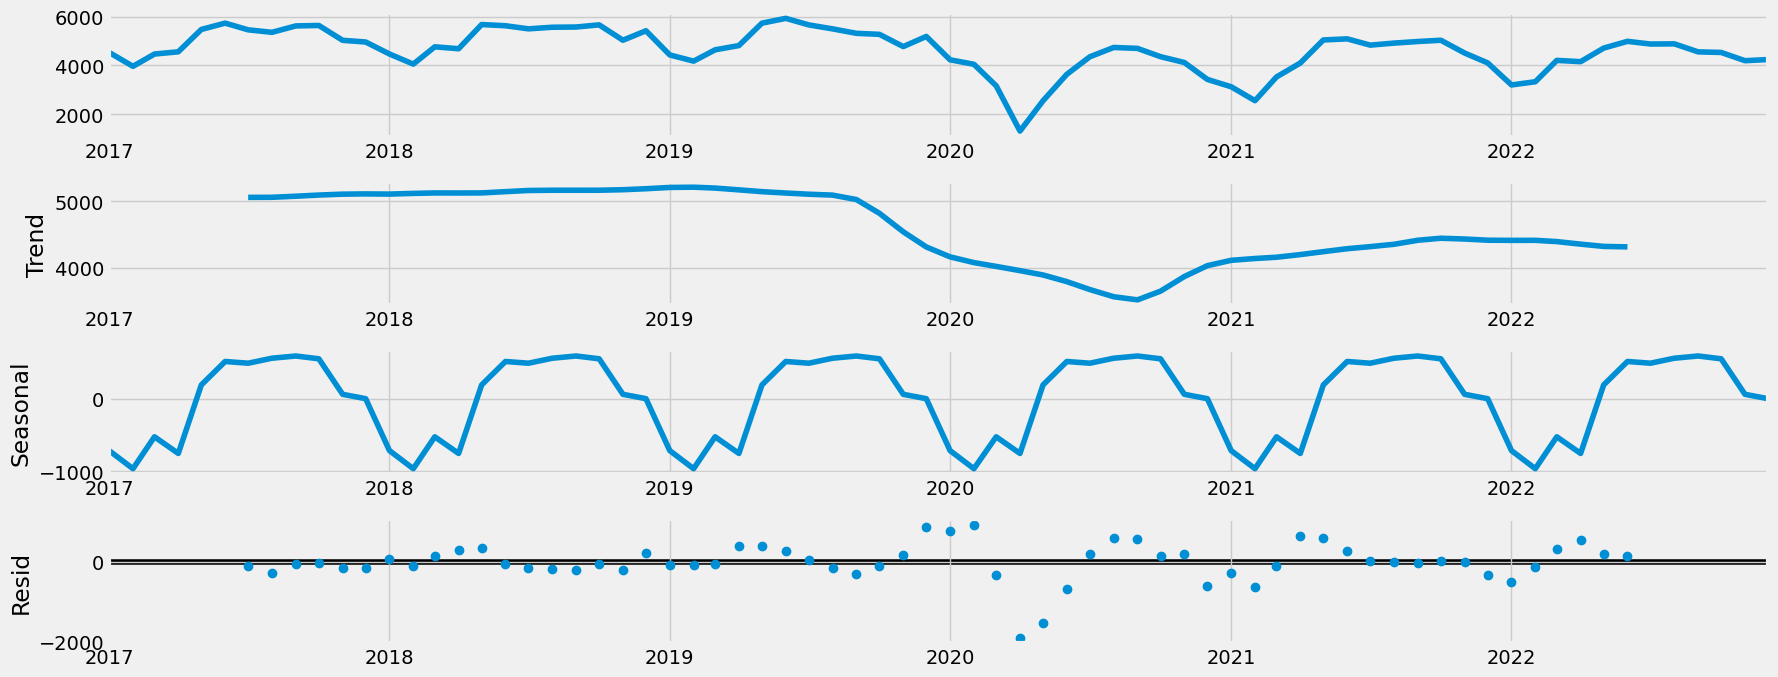

In [23]:
# Plot the separate components

decomposition.plot()
plt.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'persons_injured_time_decomposed.png'))
plt.show()

###### Notes: 
- The trend is steady until the drop around 2020 which can be explained by fewer incidents due to the Covid lockdowns. From 2021 the trend begins to rise again.



- The seasonality line shows that there is a pattern where the number of persons injured is highest in around the middle of the year and lowest at the beginning and end of year. 

### 04. Testing for Stationarity

In [24]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define function to print output of Dickey-Fuller test
def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(collisions_sub['PERSONS INJURED Y-M'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.599747
p-value                         0.093049
Number of Lags Used             4.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


##### Notes:

Null hypothesis: Prescence of unit root
Alternative hypothesis: Absence of unit root.

The 5% critical value (-2.9) is almost the same as the test statistic (-2.6)

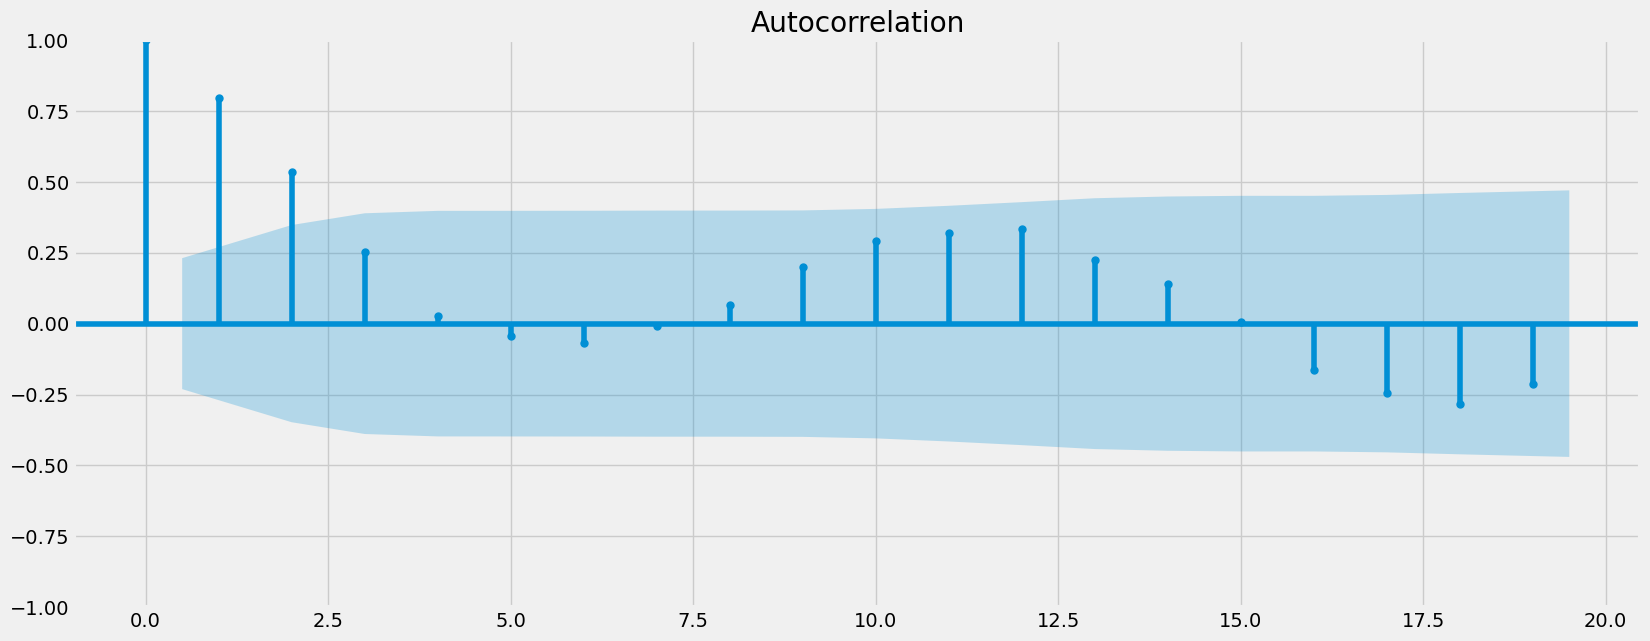

In [25]:
# Autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import the autocorrelation and partial correlation plots

plot_acf(collisions_sub)
plt.show()

###### Notes:

There are only a few lines above the confidence interval which suggests that the lags are only very weakly autocorrelated with each other.

### 05. Stationarizing data

In [26]:
# Differencing to transform time series

collisions_sub_diff = collisions_sub - collisions_sub.shift(1) 

In [27]:
# Remove the missing values that came about as a result of the differencing

collisions_sub_diff.dropna(inplace = True) 

In [28]:
collisions_sub_diff.head()

,PERSONS INJURED Y-M
year-month,
2017-02-01,-568.0
2017-03-01,503.0
2017-04-01,92.0
2017-05-01,915.0
2017-06-01,259.0


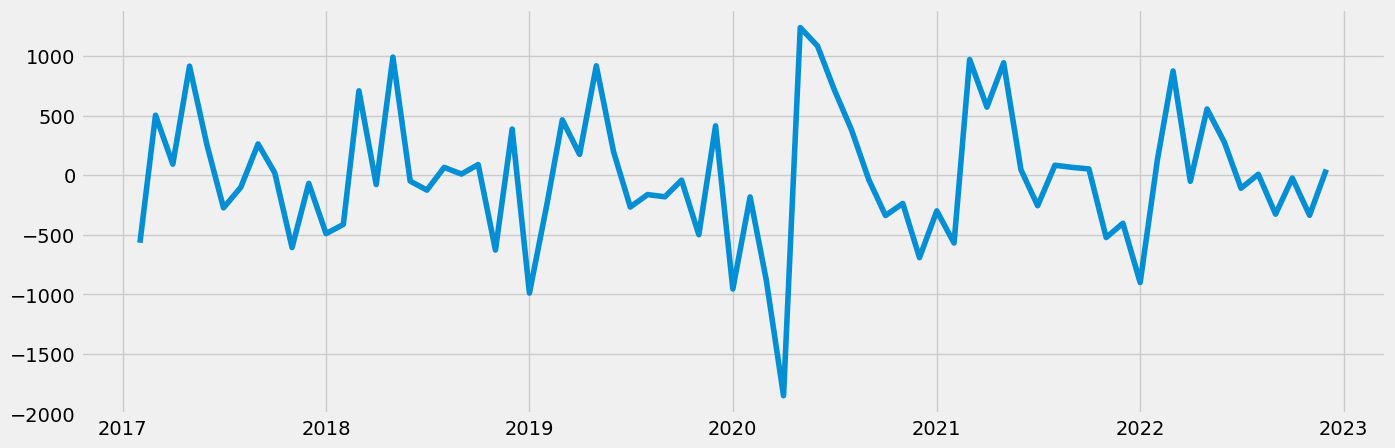

In [29]:
# Plot time series after differencing

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(collisions_sub_diff)

In [30]:
# Conduct another Dickey-Fuller test to check for stationarity

dickey_fuller(collisions_sub_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -5.774798e+00
p-value                        5.289967e-07
Number of Lags Used            7.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


###### Notes:

The 5% critical value is greater than the test statistic which also means that the null hypothesis can be rejected.

Since the data does not have any unit root, we can conclude that it is stationary and can be used for forecasting.


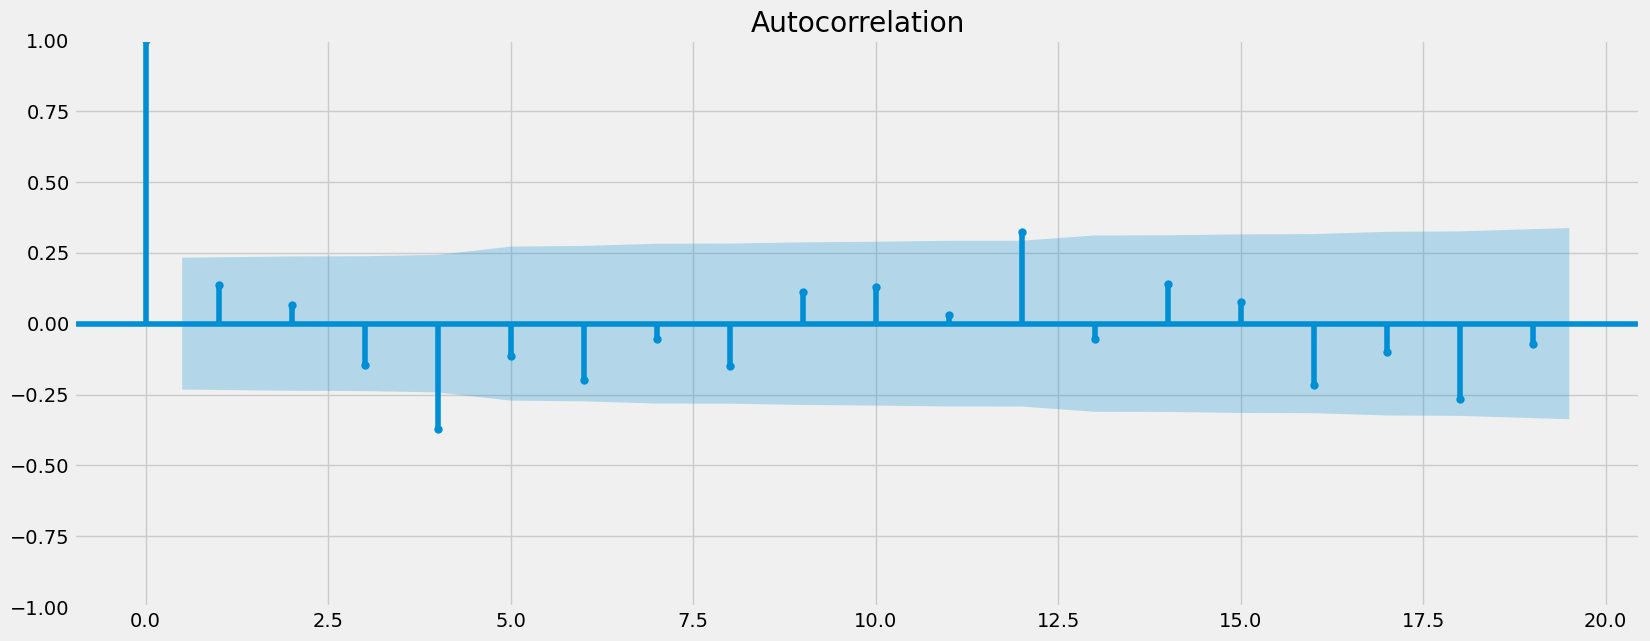

In [31]:
# Check autocorrelation plot

plot_acf(collisions_sub_diff)
plt.show()

There is only one line slightly above the confidence interval which means a strong stationarity.

In [32]:
# Exporting data

collisions.to_csv(os.path.join(path, '02. Data', 'Prepared data', 'collisions_viz.csv'), index = False)